In [76]:
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neurotools.io.gdrive import download_sheets_doc
from neurotools.io.files import load_embedding_model
%matplotlib inline


# PROCESS EMBEDDING AND DIMENSIONS

## LOAD EMBEDDING AND DIMENSIONS

In [77]:
emb, word2rank_dict = load_embedding_model('005_en_in_commoncrawl_v1_20180330.bin')

In [96]:
cutoff = round((1/5)*len(word2rank_dict))

In [98]:
def get_average_vector(words, emb):
    """
        Average the word vectors of a list of words.
    """
    words_in_emb = [emb[word] for word in words if word in emb.vocab.keys()]
    total = np.sum(words_in_emb, axis=0)
    count = len(words_in_emb)
    return total / count

In [56]:
dimensions_doc_id = '1qa6hmUwjipTocTLIAIBEuObkzVGwWUvYXV04HjMw0BM'
dimensions_doc = download_sheets_doc(dimensions_doc_id, has_column_labels=True)
dimensions_nf = dimensions_doc['dimensions_v2.csv']
dimensions_nf = dimensions_nf.loc[(dimensions_nf['whisky_relevant'] == '1') & (dimensions_nf['en'] != ''), ['en_label', 'en']]
dimensions_nf['en_label'] = 'nf_' + dimensions_nf['en_label']

In [57]:
diageo_dimensions_doc_id = '1_OdlI2ieNMAXAepeqtjDIghRVj6Lgoaf9caiZK8jmkA'
diageo_dimensions_doc = download_sheets_doc(diageo_dimensions_doc_id, has_column_labels=True)
dimensions_diageo = diageo_dimensions_doc['Dimensions']
dimensions_diageo = dimensions_diageo.loc[dimensions_diageo['Content'] != '', ['Dimension', 'Content']]
dimensions_diageo['Dimension'] = 'dg_' + dimensions_diageo['Dimension']

In [58]:
dimensions_nf.columns = ['Dimension', 'Content']

In [59]:
dimensions_nf.shape

(16, 2)

In [60]:
dimensions = pd.concat([dimensions_diageo, dimensions_nf], axis=0, ignore_index=True)

In [62]:
dimensions.append{}

In [63]:
dimensions

,Dimension,Content
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...
1,dg_Confident,confident optimistic hopeful reassure certainl...
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...
3,dg_Social,social civil collective community cordial
4,dg_Playful,playful delightful lighthearted lively flirtat...
5,dg_Street-Smart,hardened astute cunning experienced savvy stre...
6,dg_Progressive,progressive dynamic enlightened modern
7,dg_Stylish,stylish classy chic trendy elegant fashionable...
8,dg_Inspiring,inspired inspiration passionate incredible upl...
9,dg_Authentic,authentic genuine unique unpretentious


In [70]:
emb['street']

array([ 9.06485438e-01, -1.98477373e-01,  8.48460972e-01,  5.06138563e+00,
       -3.58491254e+00, -5.24342251e+00,  5.03968716e+00,  2.46836782e+00,
       -1.57667208e+00,  3.99307537e+00,  1.76606810e+00,  3.51971316e+00,
       -4.82044071e-01, -2.96393442e+00,  2.98825812e+00,  6.34178686e+00,
        3.41874695e+00, -6.80340719e+00,  4.09660864e+00,  5.15216875e+00,
        3.51979280e+00, -4.18580437e+00,  3.18653941e+00, -3.74957824e+00,
        1.15288007e+00, -2.67013967e-01,  1.72129333e+00,  5.33731580e-01,
        2.77903152e+00, -1.31512821e+00, -2.85506964e+00,  3.73316312e+00,
        4.30917382e-01,  6.46688700e-01, -2.00630832e+00, -4.01146173e+00,
        5.12015915e+00, -1.14160228e+00, -1.69475943e-01,  1.98474956e+00,
        1.78286088e+00,  3.90369368e+00,  5.79096746e+00, -2.19927490e-01,
        2.61757046e-01,  5.17830372e+00, -2.64075136e+00,  2.06870794e+00,
        5.47280967e-01, -3.30385590e+00, -8.56038928e-01, -4.75514501e-01,
        3.94387341e+00,  

In [71]:
additions = [{'Dimension': 'dg_flavour', 'Content': 'rich malt fruity simple delicate sweetness'},
{'Dimension': 'dg_brand', 'Content': 'street wise street smart smart thinking'}]

In [73]:
dimensions = dimensions.append(additions)

In [74]:
dimensions.to_csv('csv/dimensions.csv', index=False)

## GET WORD VECTORS OF DIMENSIONS

In [124]:
dimensions['tokens'] = dimensions['Content'].str.lower().str.replace(r'[^a-z ]', '').str.split()

In [125]:
dimensions['wv'] = dimensions['tokens'].map(lambda x: get_average_vector(x, emb))

In [126]:
dimensions.head()

,Dimension,Content,tokens,wv
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...,"[relax, unwind, enjoy, soothe, calm, serene, l...","[-0.38982093, 1.0310897, -0.3649658, -1.062084..."
1,dg_Confident,confident optimistic hopeful reassure certainl...,"[confident, optimistic, hopeful, reassure, cer...","[0.35235944, -2.103267, 0.75326306, -2.0183167..."
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...,"[welcome, greet, warmly, hospitable, invite, g...","[0.32264853, -1.3409846, 0.8682901, -1.4583006..."
3,dg_Social,social civil collective community cordial,"[social, civil, collective, community, cordial]","[0.95336664, -1.0829761, 1.1170304, -0.0309140..."
4,dg_Playful,playful delightful lighthearted lively flirtat...,"[playful, delightful, lighthearted, lively, fl...","[-0.72059196, -0.50438666, -0.35774776, -1.436..."


In [127]:
dimensions.shape[0]

48

# LOAD CANDIDATE WORDS

In [90]:
diageo_words_doc_id = '1Vc_NYmC69G0KkdvrUS79jhhu85p5wkhfGnwc9aHTDeM'
diageo_words_doc = download_sheets_doc(diageo_words_doc_id, has_column_labels=True)

In [91]:
ingredients = ['malt', 'grain']
flavors = ['sweet, sweetness',
           'richness, rich',
           'smooth, smoothness',
           'fruity',
           'woody wood taste']
smart_thinking = ['streetwise, streetsmart, thinking, clever, sharp, ease', 'smooth, smoothness']

In [92]:
def get_words_from_df(df):
    return list(df['Word'].values)

In [100]:
def filter_words_on_cutoff(words, word2rank_dict, cutoff):
    return [word for word in words if word2rank_dict[word] < cutoff]

In [117]:
def get_words_for_hook(sheet_dict, hook_keys, word2rank_dict, cutoff):
    container = []
    for key in hook_keys:
        container.extend(get_words_from_df(sheet_dict[key]))
    words = filter_words_on_cutoff(set(container), word2rank_dict, cutoff)
    return words

In [118]:
words_ingredients = get_words_for_hook(diageo_words_doc, ingredients, word2rank_dict, cutoff)
words_flavors = get_words_for_hook(diageo_words_doc, flavors, word2rank_dict, cutoff)
words_smart_thinking = get_words_for_hook(diageo_words_doc, smart_thinking, word2rank_dict, cutoff)

In [111]:
# number words before filtering

99
193
91


In [114]:
# number words after filtering

43
134
69


In [115]:
def get_df_for_hook(words):
    df = pd.DataFrame(list(words), columns = ['word'])
    df['wv'] = df['word'].map(lambda x: get_average_vector([x], emb))
    return df

In [120]:
df_ingredients = get_df_for_hook(words_ingredients)
df_flavors = get_df_for_hook(words_flavors)
df_smart_thinking = get_df_for_hook(words_smart_thinking)

# GET SIMILARITY OF WORDS WITH DIMENSIONS

In [121]:
def cosine_similarity(a,b):
    """
        Compute the cosine similarity of a and b.
    """
    return np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) )

In [122]:
def get_similarity_with_dimensions(row, dimensions):
    """
        Get similarity of row's word vector and every dimension.
        row : row of the movie dataframe
        dimensions : dataframe containing Neuroflash dimensions
    """
    for k in range(dimensions['Dimension'].shape[0]):
        name = 'dim_' + str(dimensions['Dimension'].iloc[k])
        # define a new column for the cosine similarity of dimension k and the post text
        row[name] = cosine_similarity(row['wv'], dimensions['wv'].iloc[k])
    return row

In [128]:
df_ingredients = df_ingredients.apply(lambda x: get_similarity_with_dimensions(x, dimensions), axis=1)
df_flavors = df_flavors.apply(lambda x: get_similarity_with_dimensions(x, dimensions), axis=1)
df_smart_thinking = df_smart_thinking.apply(lambda x: get_similarity_with_dimensions(x, dimensions), axis=1)

In [129]:
df_ingredients.drop(columns=['wv']).to_csv('csv/sim_ingredients.csv', index=False)
df_flavors.drop(columns=['wv']).to_csv('csv/sim_flavors.csv', index=False)
df_smart_thinking.drop(columns=['wv']).to_csv('csv/sim_smart_thinking.csv', index=False)

In [132]:
def sum_over_dimensions(df, nf_only = True):
    if nf_only:
        consider = df[[x for x in df.columns if 'dim_nf' in x]]
        labels = ['word', 'sum_over_NF_dims']
    else:
        consider = df[[x for x in df.columns if 'dim' in x]]
        labels = ['word', 'sum_over_dims']
    sum_df = pd.concat([df.iloc[:,0], consider.sum(axis=1)], axis=1)
    sum_df.columns = labels
    return sum_df.sort_values(labels[1], ascending=False)

In [133]:
sum_over_dimensions(df_ingredients).head(20)

,word,sum_over_NF_dims
33,fruity,3.792745
0,vegetable,2.004845
34,coarse,1.630495
11,grain,1.601987
31,beer,1.475540
42,whisky,1.430165
10,milk,1.418264
1,distill,1.395086
39,vodka,1.344687
29,malt,1.321468


In [134]:
sum_over_dimensions(df_flavors).head(20)

,word,sum_over_NF_dims
51,truly,5.599674
70,charm,5.391906
37,wonderfully,5.264797
64,subtle,5.234277
60,vibrant,5.204802
111,comfortable,5.190671
121,unique,5.128155
118,delicate,4.999129
103,earthy,4.872749
84,exquisite,4.834724


In [135]:
sum_over_dimensions(df_smart_thinking).head(20)

,word,sum_over_NF_dims
4,attractive,5.384535
33,subtle,5.234277
52,comfortable,5.190671
42,simplicity,5.079498
40,sophisticate,5.023508
61,delicate,4.999129
20,perfectly,4.754438
30,effortless,4.583854
63,simple,4.563620
46,gentle,4.551089


In [136]:
sum_over_dimensions(df_ingredients).to_csv('csv/top_ingredients.csv', index=False)
sum_over_dimensions(df_flavors).to_csv('csv/top_flavors.csv', index=False)
sum_over_dimensions(df_smart_thinking).to_csv('csv/top_smart_thinking.csv', index=False)

# Plots

In [137]:
top_ingredients = pd.read_csv('csv/top_ingredients.csv')
top_flavors = pd.read_csv('csv/top_flavors.csv')
top_smart_thinking = pd.read_csv('csv/top_smart_thinking.csv')

In [142]:
def plot_bargraph(df, hook):
    plt.figure(figsize=(17,9))
    plt.title('Hook: {}'.format(hook), size=20)
    plt.bar(range(min(50, df.shape[0])), df.set_index('word').head(min(50, df.shape[0])).sort_values('sum_over_NF_dims').values)
    plt.xticks(range(min(50, df.shape[0])),  df.head(min(50, df.shape[0])).sort_values('sum_over_NF_dims')['word'], rotation=90, size=15);
    plt.ylabel('Sum of Similarity over Whiskey Dims', size=20)
    plt.savefig('plot/topwords_{}.png'.format(hook), bbox_inches='tight', dpi=300)

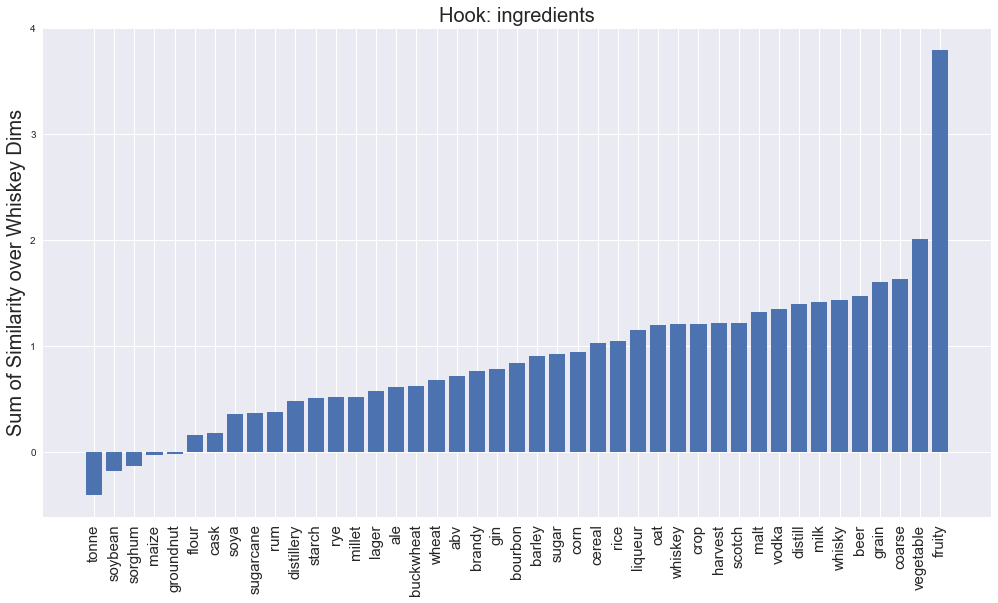

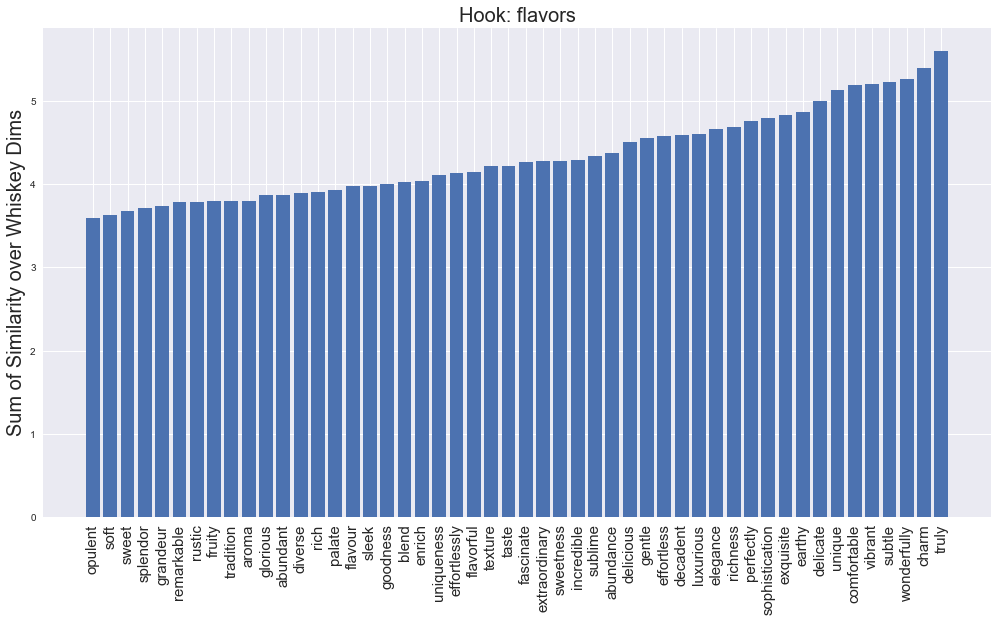

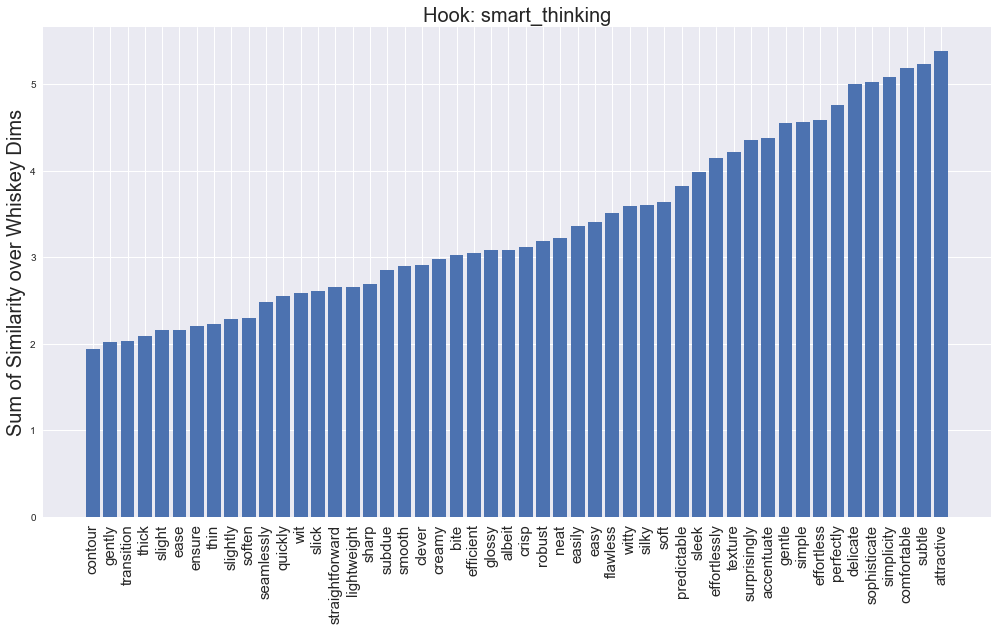

In [143]:
plot_bargraph(top_ingredients, 'ingredients')
plot_bargraph(top_flavors, 'flavors')
plot_bargraph(top_smart_thinking, 'smart_thinking')